In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

105.06505494432322 33.77421497721886
103.57658688475391 34.4702511881275


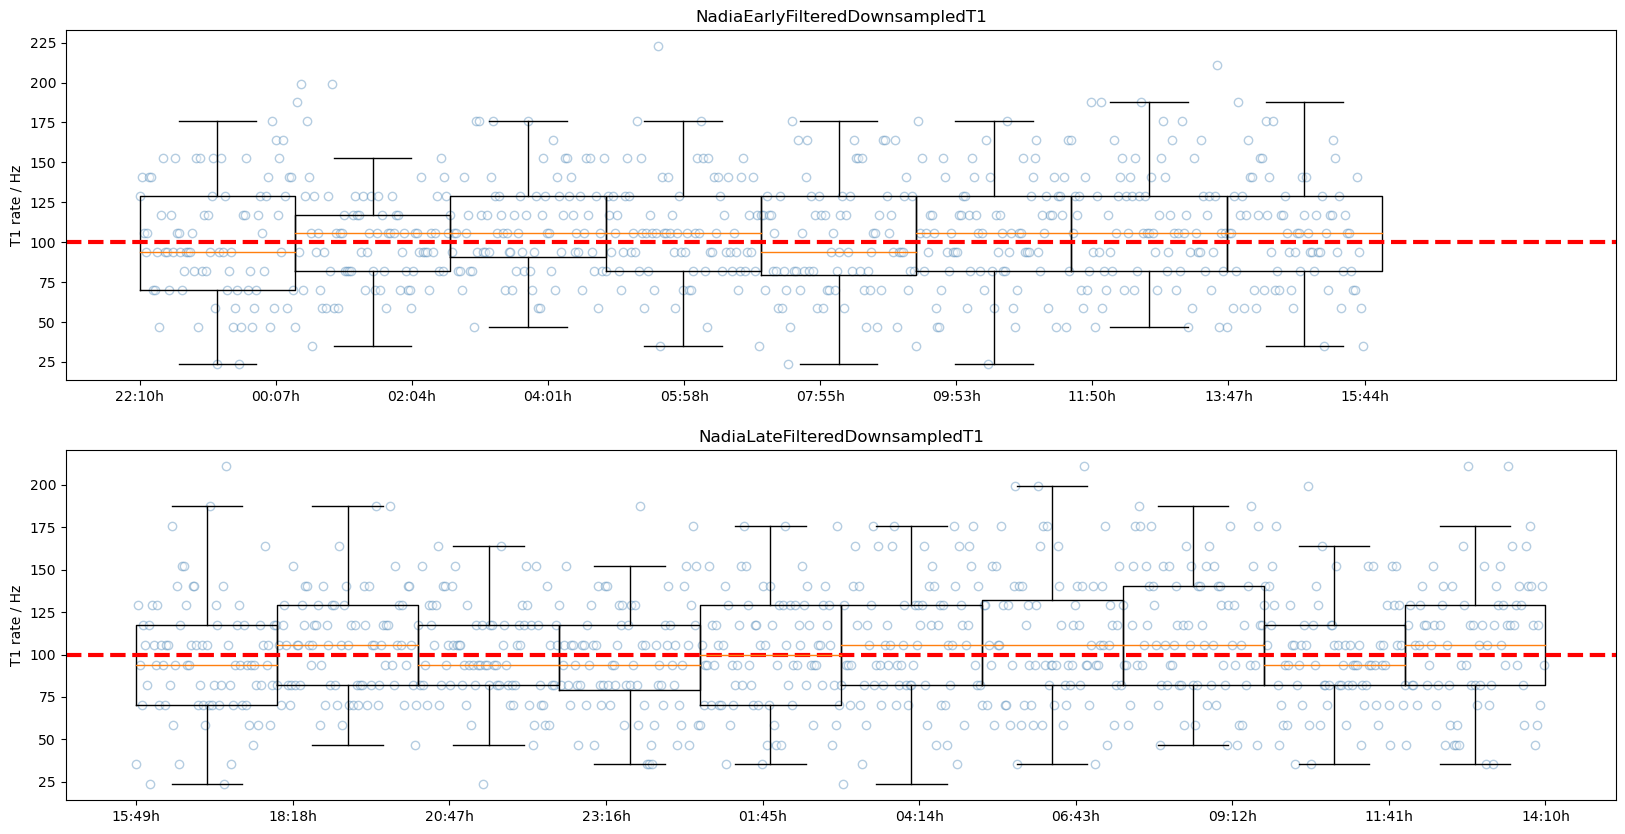

In [3]:
plt.rcParams["figure.figsize"] = [20, 10]
fig, axes = plt.subplots(2, 1)


for ax, station in zip(
    axes, ["NadiaEarlyFilteredDownsampledT1", "NadiaLateFilteredDownsampledT1"]
):
    violins = []

    root_path = f"/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Mar2023/{station}/"
    for file in os.listdir(root_path):
        data = np.loadtxt(root_path + file)
        violins.append(sum(data) / (8.33e-9 * 2048 * len(data)))

    ax.scatter(
        range(len(violins)),
        violins,
        facecolor="white",
        edgecolors="steelblue",
        alpha=0.4,
    )

    print(np.mean(violins), np.std(violins))

    combine = 80
    indices = np.arange(0, 799, combine)
    violins = np.split(np.array(violins), indices)
    positions = [combine] + [int(i + 0.5 * combine) for i in indices]

    ax.boxplot(violins, positions=positions, widths=combine, showfliers=False)
    ax.axhline(100, c="r", ls="--", lw=3)
    # _ = plt.violinplot(violins, range(50, 849, 100), vert = True, showmeans = True)
    ax.set_title(station)

    # timing information
    timestamps = np.loadtxt(
        f"/cr/tempdata01/filip/UubRandoms/Mar2023/converted/timestamps/{station}.dat",
        dtype=str,
    )
    start = int(timestamps[np.where(timestamps[:, 0] == "randoms0000.dat")[0][0]][1])
    stop = int(
        timestamps[
            np.where(
                timestamps[:, 0]
                == f"randoms0{'800' if 'Late' in station else '631'}.dat"
            )[0][0]
        ][1]
    )
    xticks = np.linspace(start, stop, 10)

    ax.set_ylabel("T1 rate / Hz")
    ax.set_xticks(
        np.linspace(0, len(os.listdir(root_path)), 10),
        [datetime.datetime.fromtimestamp(x).strftime("%H:%Mh") for x in xticks],
    )